# Reto Kaggle – Titanic classification

## Equipo 6:

*   Alejandro Díaz Villagómez - A01276769
*   Catalina García Cardenas - A01655338
*   Yarezzi Itzel García Fuentes - A01653133
*   Emiliano Saucedo Arriola - A01659258

> Date: 13/09/2023

# 1. Exploración y procesamiento de los datos

## Importación de librerías

Este notebook está enfocado en trabajar análisis exploratorio de datos por primera vez usando el conjunto de datos Titanic

In [78]:
#cargando librerias que usaré
import pandas as pd #libreria de manejo de funciones para ciencias de datos
import numpy as np # libreria para manejo de arreglos y otras operaciones numéricas científicas
import matplotlib.pyplot as plt # librería para ploteo de datos prepara el entorno de renderización
import seaborn as sns #librería para visualización de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

#paquetes para machine learning
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#paquetes para evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

#paquetes para clustering
from sklearn.cluster import KMeans

import warnings # para manejo de warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # display all rows
pd.set_option('display.max_columns', None)  # display all columns

## Exploración inicial del dataset

En este primer apartado, se busca comprender el dataset original de datos. Los métodos utilizados para esta exploración inicial son:
- `head()` Visualización de algunos registros del dataset.
- `info()` Conocer valores nulos y tipo de datos de cada columna.
- `columns()` Conocer las columnas que conforman el dataset.
- `describe()` Obtener una comprensión inicial de las tendencias centrales del dataset.



In [79]:
# Lectura del conjunto de datos
# titanic = pd.read_csv("/content/drive/MyDrive/UNI/Séptimo semestre/titanic/train.csv") #función que sirve para leer un archivo csv
# titanic_sub = pd.read_csv("/content/drive/MyDrive/UNI/Séptimo semestre/titanic/test.csv") #función que sirve para leer un archivo csv
# titanic = pd.read_csv("/content/drive/MyDrive/TC3006B-Artificial Intelligence/Reto/train.csv")
# titanic_test = pd.read_csv("/content/drive/MyDrive/TC3006B-Artificial Intelligence/Reto/test.csv")
# gender_submission = pd.read_csv("/content/drive/MyDrive/TC3006B-Artificial Intelligence/Reto/gender_submission.csv")
titanic = pd.read_csv("https://raw.githubusercontent.com/AlejandroDiaz10/TitanicClassification/main/train.csv")
titanic_test = pd.read_csv("https://raw.githubusercontent.com/AlejandroDiaz10/TitanicClassification/main/test.csv")
gender_submission = pd.read_csv("https://raw.githubusercontent.com/AlejandroDiaz10/TitanicClassification/main/gender_submission.csv")

In [80]:
# Visualización inicial de los datos leídos
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Con el método `.info()` es posible apreciar que las columnas ***Age*** y ***Cabin*** poseen datos faltantes.

In [81]:
# Inspección rápida sobre valores nulos y tipo de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# Apreciamos las columnas que conforman el dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Cada columna corresponde a lo siguiente:
1.   **PassengerId**: Identificador único para cada pasajero.
2.   **Survived**: Valor binario para indicar la clase: Survived (1) o Not Survived (0).
3.   **Pclass**: Clase del pasajero (1st, 2nd o 3rd).
4.   **Name**: Nombre del pasajero.
5.   **Sex**: Género del pasajero (male or female).
6.   **Age**: Edad del pasajero.
7.   **SibSp**: Número de hermanxs (siblings) o esposxs (spouses) abordo del Titanic.
8.   **Parch**: Número de padres (parents) o infantes (children) abordo del Titanic.
9.   **Ticket**: Número de ticket.
10.  **Fare**: Tarifa pagada por el pasajero.
11.  **Cabin**: Número de cabina del pasajero (if available).
12.  **Embarked**: Puerto donde abordó el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).



Dimensiones del dataset

In [83]:
# Verificar el número de instancias (filas: cantidad de datos total) y el número de atributos (columnas: features o características de cada instancia)
N, M = titanic.shape

print("Número de instancias (registros): ", N) # ¿cuántos registros tenemos?
print("Número de atributos (caracteríticas): ", M) # ¿cuántas características conforman a cada instancia?

Número de instancias (registros):  891
Número de atributos (caracteríticas):  12


In [84]:
# Visualización de un compilado estadístico.
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## a. Distribuciones

### i. Verificar si los datos están balanceados en las clases en las cuales se deben separar los datos.

Gracias a la descripción estadística y al análisis exploratorio de los datos, podemos confirmar que la columna Survived, en realidad, es nuestro target. Por ello, resulta imprescindible verificar que los datos estén balanceados en las clases en las cuales se deben separar los datos.

In [85]:
target = titanic["Survived"]

# Calcula el número de muestras en cada clase
class_count = target.value_counts()

# Calcula el porcentaje de muestras en cada clase
class_percentage = target.value_counts(normalize=True) * 100

# Muestra el conteo y el porcentaje de las clases
print("Class count")
print(class_count)
print("\nClass percentages")
print(class_percentage)

Class count
0    549
1    342
Name: Survived, dtype: int64

Class percentages
0    61.616162
1    38.383838
Name: Survived, dtype: float64


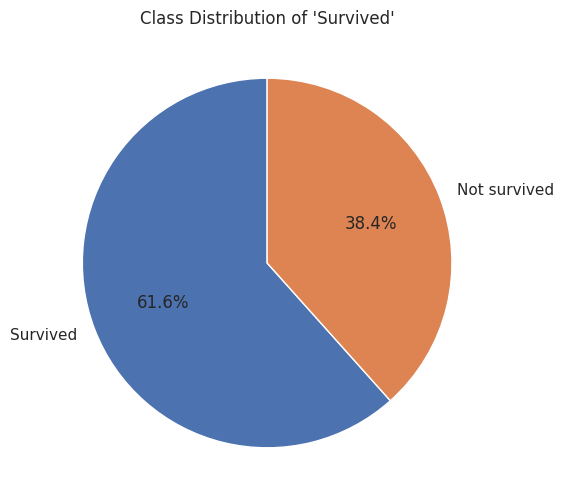

In [86]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_count, labels={"Not survived", "Survived"}, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution of 'Survived'")

# Display the pie chart
plt.show()

Como se puede apreciar, las clases no están completamente balanceados; sin embargo, consideramos que hay suficientes registros de ambas clases para evitar sesgos en el modelo.

#### Separar columnas en categóricas vs. numéricas

In [87]:
numeric_columns = titanic.select_dtypes(exclude=['object'])
numeric_columns.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [88]:
categorical_columns = titanic.select_dtypes(include=['object'])
categorical_columns.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [89]:
num_cols = titanic[["Age", "SibSp", "Parch", "Fare"]]

In [90]:
cat_cols = titanic[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

### ii. Analizar la distribución de los datos categóricos y su relación con la clase "survived". Comienza a identificar características relevantes para una clasificación precisa.

In [91]:
cat_cols.columns

Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

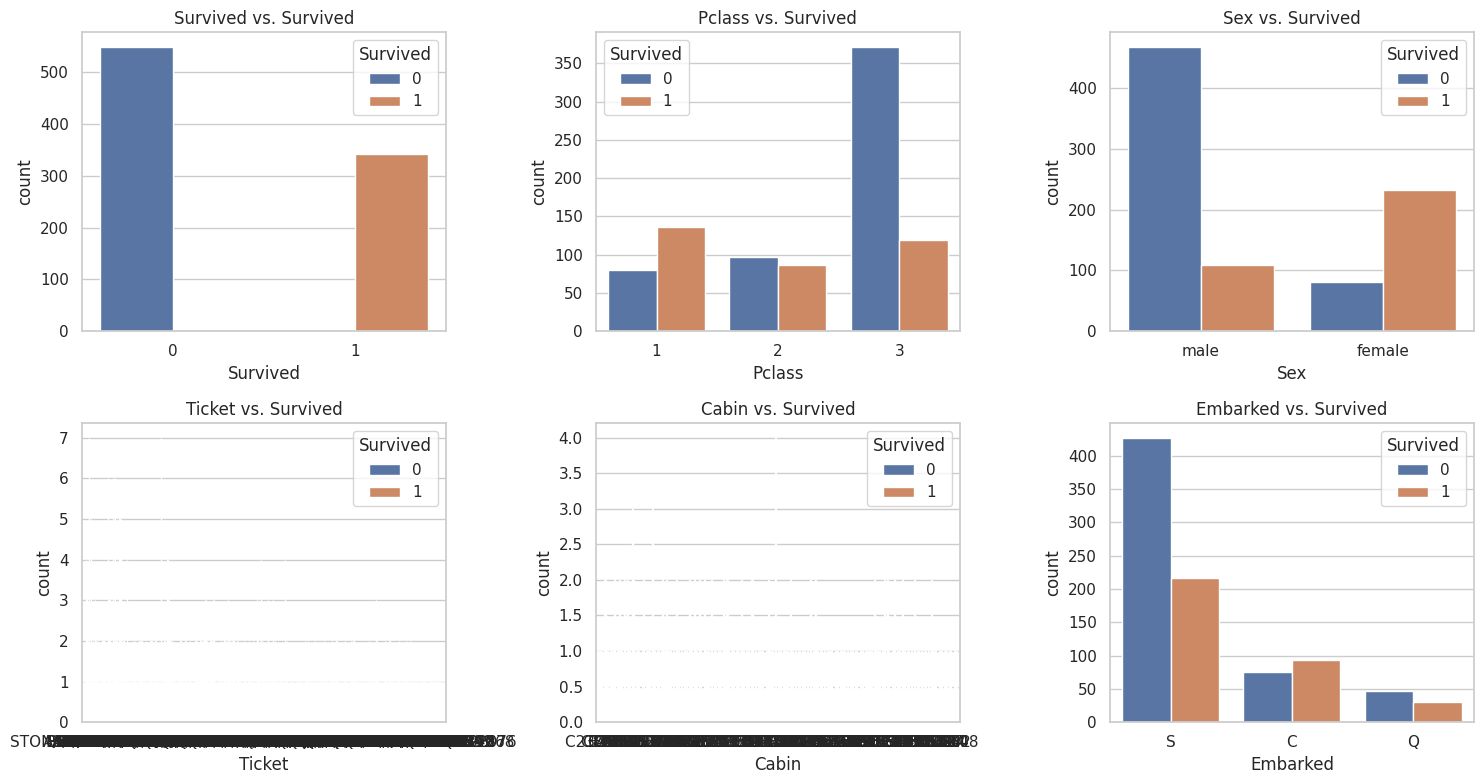

In [92]:
# Gráfico de barras para la relación entre columnas categóricas y "Survived"
# Crea una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of axes into a 1D array for easier iteration
axes = axes.flatten()

# Itera sobre las columnas categóricas y traza las gráficas en los subplots
for i, col in enumerate(cat_cols.columns):
    sns.countplot(x=col, hue='Survived', data=titanic, ax=axes[i])
    axes[i].set_title(f'{col} vs. Survived')

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra el conjunto de gráficas
plt.show()

Algunas observaciones que podemos apreciar son:
* El número de sobrevivientes es menor al número de decesos.

* **Pclass**: Parece ser que la clase del pasajero tiene una influencia significativa en la supervivencia. Los pasajeros de primera clase (Pclass=1) tienen una mayor probabilidad de sobrevivir en comparación con los de segunda y tercera clase.

* **Sex**: El género también da la impresión de ser una característica relevante. Las mujeres (Sex=Femenino) tienen una tasa de supervivencia mucho más alta que los hombres (Sex=Masculino).

* **Embarked**: El embarcadero S muestra tener una tasa de supervivencia inferior a los otros dos embarcaderos restantes. Por su parte, los embarcaderos C y Q representan un 50% de probabilidad para sobrevivir.

* Para las columnas, Ticket y Cabin existe mucha dispersión de datos, por lo que es necesario aplicar ingeniería de características.

### iii. Comprender la distribución de los datos numéricos y determinar si es necesario aplicar procesos de normalización o estandarización.

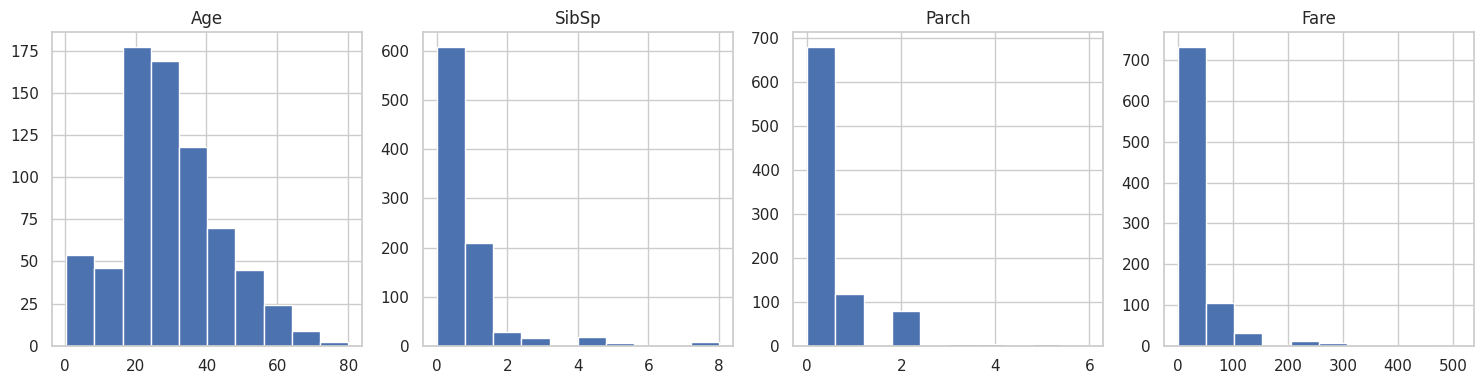

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=num_cols.shape[1], figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.hist(num_cols.iloc[:, i])
    ax.set_title(num_cols.columns[i])

plt.tight_layout()
plt.show()

In [94]:
def visualize_metrics(df, column, gender_column=None):
    # Set up the style for seaborn plot
    sns.set(style="whitegrid")

    if gender_column is not None:
        # Calculate variance for the column feature with gender filter
        column_variance = np.var(df[df['Sex'] == gender_column][column], ddof=1)  # using ddof=1 for unbiased estimator
        gender_colors = {'female': 'skyblue', 'male': 'orange'}  # Customize colors as needed
    else:
        # Calculate variance for the column feature without gender filter
        column_variance = np.var(df[column], ddof=1)  # using ddof=1 for unbiased estimator
        gender_colors = {'all': 'skyblue'}  # Customize colors as needed

    # Create a figure and specify the color based on gender
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df[df['Sex'] == gender_column] if gender_column is not None else df,
                 x=column, bins=30, kde=True, color=gender_colors.get(gender_column, 'skyblue'), label="Distribution")

    # Highlight the mean value
    if gender_column is not None:
        mean_val = df[df['Sex'] == gender_column][column].mean()
        median_val = df[df['Sex'] == gender_column][column].median()
        mode_val = df[df['Sex'] == gender_column][column].mode().iloc[0]
        min_val = df[df['Sex'] == gender_column][column].min()
        max_val = df[df['Sex'] == gender_column][column].max()
    else:
        mean_val = df[column].mean()
        median_val = df[column].median()
        mode_val = df[column].mode().iloc[0]
        min_val = df[column].min()
        max_val = df[column].max()

    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean_val, color='orange', linestyle='dashed', linewidth=2)
    plt.axvline(median_val, color='black', linestyle='dashed', linewidth=2)
    plt.axvline(mode_val, color='purple', linestyle='dashed', linewidth=2)
    plt.axvline(min_val, color='green', linestyle='dashed', linewidth=2)
    plt.axvline(max_val, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean_val, max_ylim*0.9, f'Mean: {mean_val:.2f}', horizontalalignment='right', color='orange')
    plt.text(median_val, max_ylim*0.8, f'Median: {median_val:.2f}', horizontalalignment='right', color='black')
    plt.text(mode_val, max_ylim*0.7, f'Mode: {mode_val:.2f}', horizontalalignment='left', color='purple')
    plt.text(min_val, max_ylim*0.9, f'Min: {min_val:.2f}', horizontalalignment='left', color='green')
    plt.text(max_val, max_ylim*0.9, f'Max: {max_val:.2f}', horizontalalignment='right', color='brown')

    plt.title(f'Distribution of {gender_column} {column} in Dataset' if gender_column is not None else f'Distribution of {column} in Dataset')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Column '{column}' in Titanic")
    print("-----------------------------------------")
    print(f"Variance of column content '{column}' in Titanic: {column_variance:.4f}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Range between: {min_val} and {max_val}")
    print()


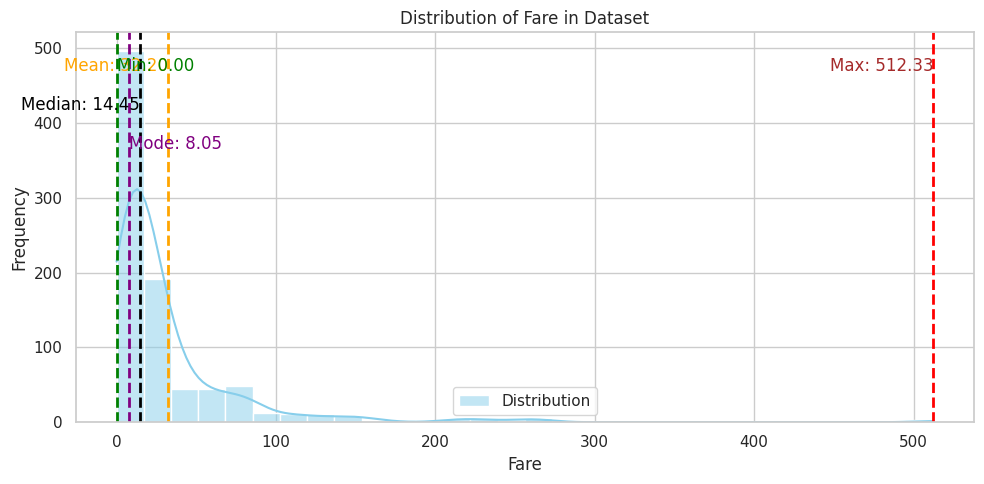

Column 'Fare' in Titanic
-----------------------------------------
Variance of column content 'Fare' in Titanic: 2469.4368
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Range between: 0.0 and 512.3292



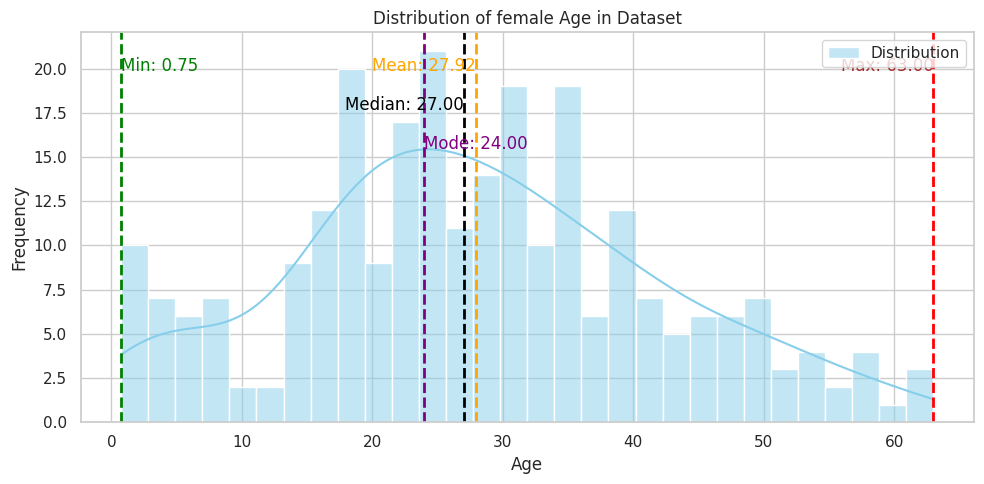

Column 'Age' in Titanic
-----------------------------------------
Variance of column content 'Age' in Titanic: 199.0962
Mean: 27.915708812260537
Median: 27.0
Mode: 24.0
Range between: 0.75 and 63.0



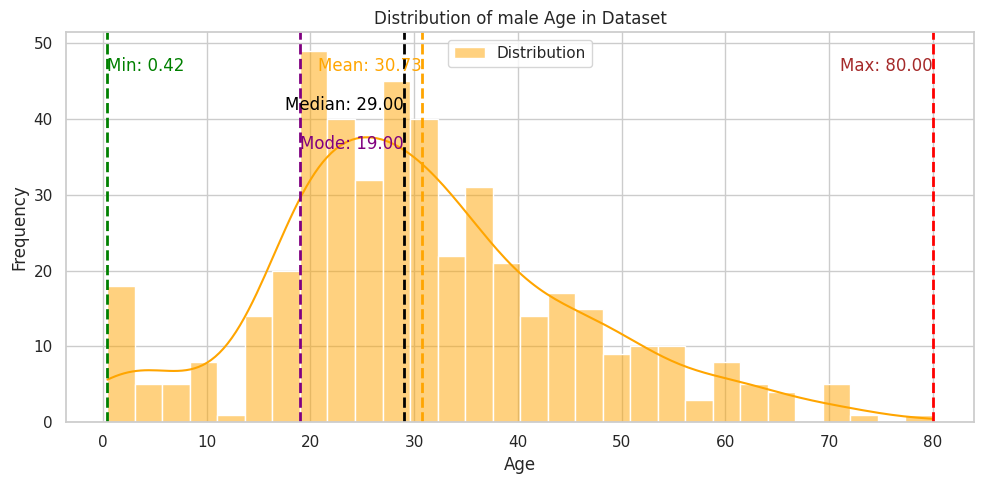

Column 'Age' in Titanic
-----------------------------------------
Variance of column content 'Age' in Titanic: 215.4496
Mean: 30.72664459161148
Median: 29.0
Mode: 19.0
Range between: 0.42 and 80.0



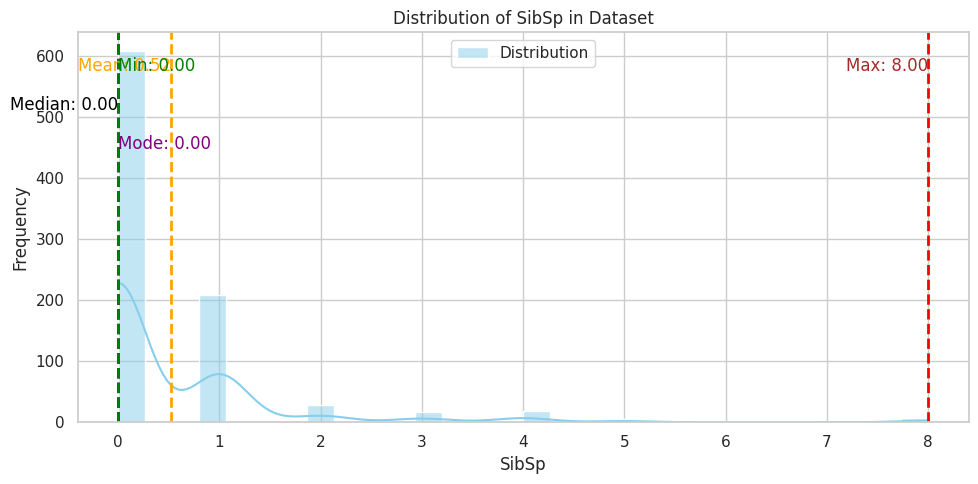

Column 'SibSp' in Titanic
-----------------------------------------
Variance of column content 'SibSp' in Titanic: 1.2160
Mean: 0.5230078563411896
Median: 0.0
Mode: 0
Range between: 0 and 8



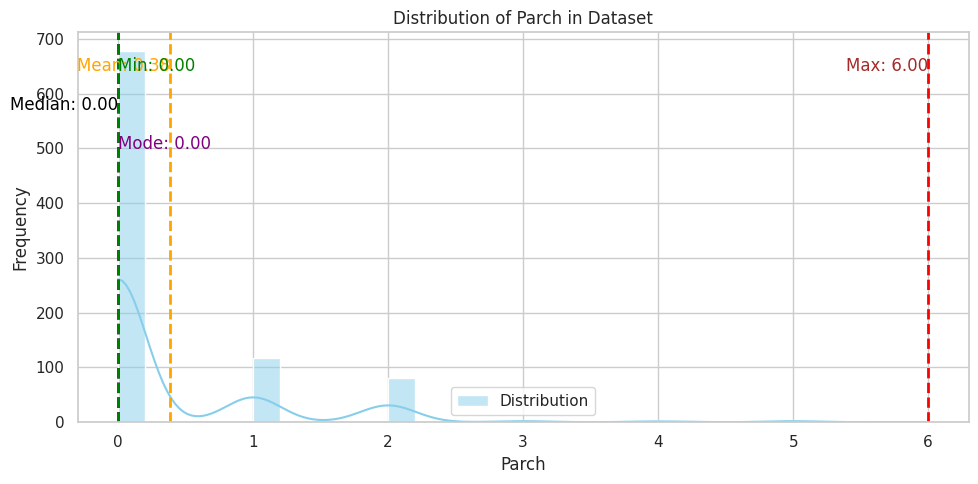

Column 'Parch' in Titanic
-----------------------------------------
Variance of column content 'Parch' in Titanic: 0.6497
Mean: 0.38159371492704824
Median: 0.0
Mode: 0
Range between: 0 and 6



In [95]:
visualize_metrics(titanic,'Fare')
visualize_metrics(titanic, 'Age', 'female')
visualize_metrics(titanic, 'Age', 'male') # Specify the gender column ('Sex') here
visualize_metrics(titanic, 'SibSp')
visualize_metrics(titanic, 'Parch')

Como podemos apreciar, 'Age' es la única feature que posee una distribución estándar normal. El resto de las columnas muestran estar sesgadas hacia la derecha, por lo que es recomendable estandarizarlas para mejorar el rendimiento de algunos algoritmos, tales como kNN o SVM. Incluso, modelos como regresión logística o lineal tienen un mejor desempeño cuando las características se encuentran con distribuciones normales. De igual manera, la estandarización puede ayudar a reducir el ruido generado por los outliers.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

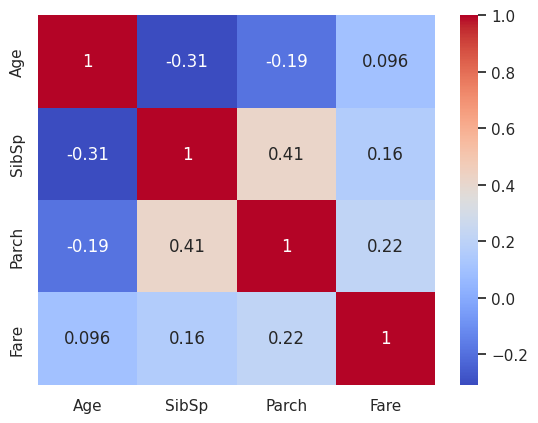

In [96]:
print(num_cols.corr())
sns.heatmap(num_cols.corr(), cmap="coolwarm", annot= True)

Al graficar la matriz de correlación entre las columnas numéricas, no se puede distinguir alguna correlación fuerte entre variables.

In [97]:
pd.pivot_table(titanic, index="Survived", values=num_cols.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


## b. Datos faltantes

### i. Identificar y visualizar los datos faltantes.

In [98]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

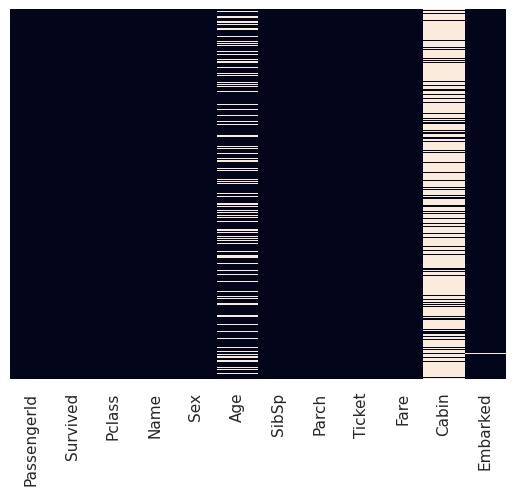

In [100]:
# mapa de calor que representa visualmente la distribución de los valores nulos en el DataFrame
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [101]:
# Valores porcentuales de los datos faltantes del df
(titanic.isna().sum()/titanic.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [102]:
(titanic_test.isna().sum()/titanic.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

### ii. Decidir qué características requieren imputaciones y cuáles no. Justificar la decisión y eliminar las columnas no seleccionadas.

Evaluando los datos faltantes se llegó al siguiente consenso:
- **Age**: Es recomendable preserva esta columna, ya que solo el 19.865% de los datos son faltantes, por lo que se puede llevar a cabo técnicas de imputación de la media, mediana o moda. No se recomienda eliminar esta columna, ya que es una característica que aporta valor al análisis debido a que ayuda a explicar la relación que existe con los sobrevivientes.
- **Cabin**: De todas las características presentes, Cabin es aquella que presenta el mayor número de datos faltantes (77.104%), por lo que se recomienda eliminar del análisis, ya que si se realiza alguna imputación sobre la columna es posible que se introduzca ruido afectando los resultados que pueda arrojar el modelo.
- **Embarked**: Al ser pocos los datos faltantes, se podría eliminar o utilizar la moda. En este caso, se optará por utilizar la moda para la imputación.

### iii. Aplicar técnicas de imputación para los datos faltantes. Seleccionar la mejor técnica y justificar la elección.

#### Imputación de columna 'Age'

Imputación de valores: Se extraerá la media/promedio de la columna de edad, pero haciendo distinción entre las medias de aquellos identificados como hombres y mujeres. Al imputar la edad promedio de acuerdo con el género, es más probable que las imputaciones sean más precisas y se ajusten a las distribuciones entre hombres y mujeres.

In [103]:
# Promedio de edad en mujeres
mean_value = titanic[titanic['Sex']=='female']['Age'].mean()
print(mean_value)

# Reemplazar NaN por la meda
titanic.loc[(titanic['Sex'] == 'female') & (titanic['Age'].isnull()), 'Age'] = mean_value

27.915708812260537


In [104]:
# Promedio de edad en hombres
mean_value = titanic[titanic['Sex']=='male']['Age'].mean()
print(mean_value)

# Reemplazar NaN por la meda
titanic.loc[(titanic['Sex'] == 'male') & (titanic['Age'].isnull()), 'Age'] = mean_value

30.72664459161148


In [105]:
# Promedio de edad en mujeres
mean_value = titanic_test[titanic_test['Sex']=='female']['Age'].mean()
print(mean_value)

# Reemplazar NaN por la meda
titanic_test.loc[(titanic_test['Sex'] == 'female') & (titanic_test['Age'].isnull()), 'Age'] = mean_value

30.27236220472441


In [106]:
# Promedio de edad en hombres
mean_value = titanic_test[titanic_test['Sex']=='male']['Age'].mean()
print(mean_value)

# Reemplazar NaN por la meda
titanic_test.loc[(titanic_test['Sex'] == 'male') & (titanic_test['Age'].isnull()), 'Age'] = mean_value

30.27273170731707


In [107]:
#Valores porcentuales de los datos faltantes del df
(titanic.isna().sum()/titanic.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [108]:
#Valores porcentuales de los datos faltantes del df
(titanic_test.isna().sum()/titanic_test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

#### Eliminación de columna 'Cabin'

In [109]:
titanic.drop(columns=['Cabin'], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [110]:
titanic_test.drop(columns=['Cabin'], inplace=True)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


#### Eliminación de otras columnas

Dado que las columnas 'PassengerId', 'Name' y 'Ticket' representan valores únicos, consideramos que no es necesario conservarlas puesto que no presentan valor para un modelo predictivo.

In [111]:
titanic.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [112]:
titanic_test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


#### Imputación de columna 'Embarked'

In [113]:
titanic['Embarked'].isnull().sum()

2

In [114]:
titanic_test['Embarked'].isnull().sum()

0

La columna "Embarked" posee pocos datos faltantes. Además,

In [115]:
imputer = SimpleImputer(strategy='most_frequent')

columns_to_impute = ['Embarked']

imputer.fit(titanic[columns_to_impute])

titanic[columns_to_impute] = imputer.transform(titanic[columns_to_impute])

In [116]:
print("Null values:", titanic['Embarked'].isnull().sum())

Null values: 0


In [117]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [118]:
imputer = SimpleImputer(strategy='most_frequent')

columns_to_impute = ['Fare']

imputer.fit(titanic_test[columns_to_impute])

titanic_test[columns_to_impute] = imputer.transform(titanic_test[columns_to_impute])

In [119]:
print("Null values:", titanic_test['Fare'].isnull().sum())

Null values: 0


In [120]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Una vez que los datos ya no presentan información sin clasificar, se procede a analizar la correlación de las columnas del dataset. Esto para cuantificar la relación entre dos variables numéricas.

## c. Análisis de correlación y d. Transformación de datos:

### i. Realizar un análisis de correlación para decidir qué características deben mantenerse y cuáles descartarse.

La correlación es una medida estadística que evalúa la relación lineal entre dos variables numéricas. Para calcular la correlación, ambas variables deben ser numéricas, por lo tanto es necesario convertir las variables categóricas en valores numéricos para calcular la correlación.

### Sustitución de los valores no numéricos a valores numéricos

##### Conversión de columnas 'Sex' y 'Embarked'
Se decidió utilizar One Hot Encoding para ambas columnas, por lo siguiente:
- One-Hot Encoding crea columnas binarias separadas para cada categoría única en una variable categórica, lo que nos lleva a no realizar suposiciones sobre la relación entre las categorías.

- Las columnas son fáciles de interpretrar.


In [121]:
encoder = OneHotEncoder()

# Ajustar el codificador a los datos y transformar la variable categórica
encoded_data = encoder.fit_transform(titanic[['Sex', 'Embarked']])

# Convertir la matriz dispersa a un DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

titanic = titanic.drop(columns=['Sex', 'Embarked'])
titanic = pd.concat([titanic, encoded_df], axis=1)

In [122]:
titanic.head() #observamos como el valor de Sex está expresado en booleanos

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [123]:
encoder = OneHotEncoder()

# Ajustar el codificador a los datos y transformar la variable categórica
encoded_data = encoder.fit_transform(titanic_test[['Sex', 'Embarked']])

# Convertir la matriz dispersa a un DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

titanic_test = titanic_test.drop(columns=['Sex', 'Embarked'])
titanic_test = pd.concat([titanic_test, encoded_df], axis=1)

In [124]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


##MANEJO DE OUTLIERS

Los puntos dispersos en el gráfico pueden ser considerados valores atípicos o "outliers", ya que se apartan notablemente de la tendencia general de los datos. Estos valores inusuales, en ocasiones, pueden introducir ruido en el análisis de nuestro algoritmo, lo que podría afectar la interpretación de los resultados. <br>
Por otro lado, el grupo de datos que se encuentra dentro de la caja en el gráfico representa la parte más consistente y relevante desde el punto de vista estadístico. Estos datos dentro del rango intercuartil presentan una mayor coherencia y representatividad en términos de tendencia y comportamiento.

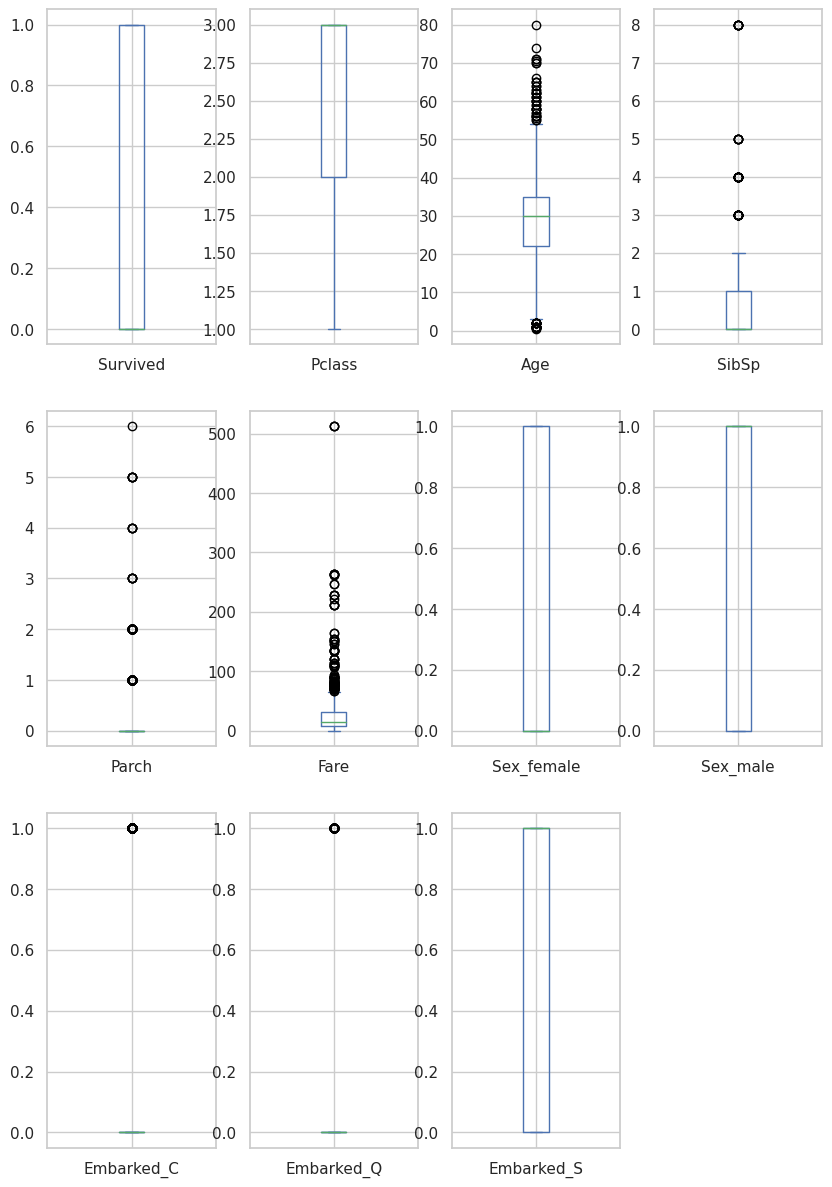

In [125]:
#gráfico de boxplots

titanic.plot(kind ='box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (10,20))
plt.show()

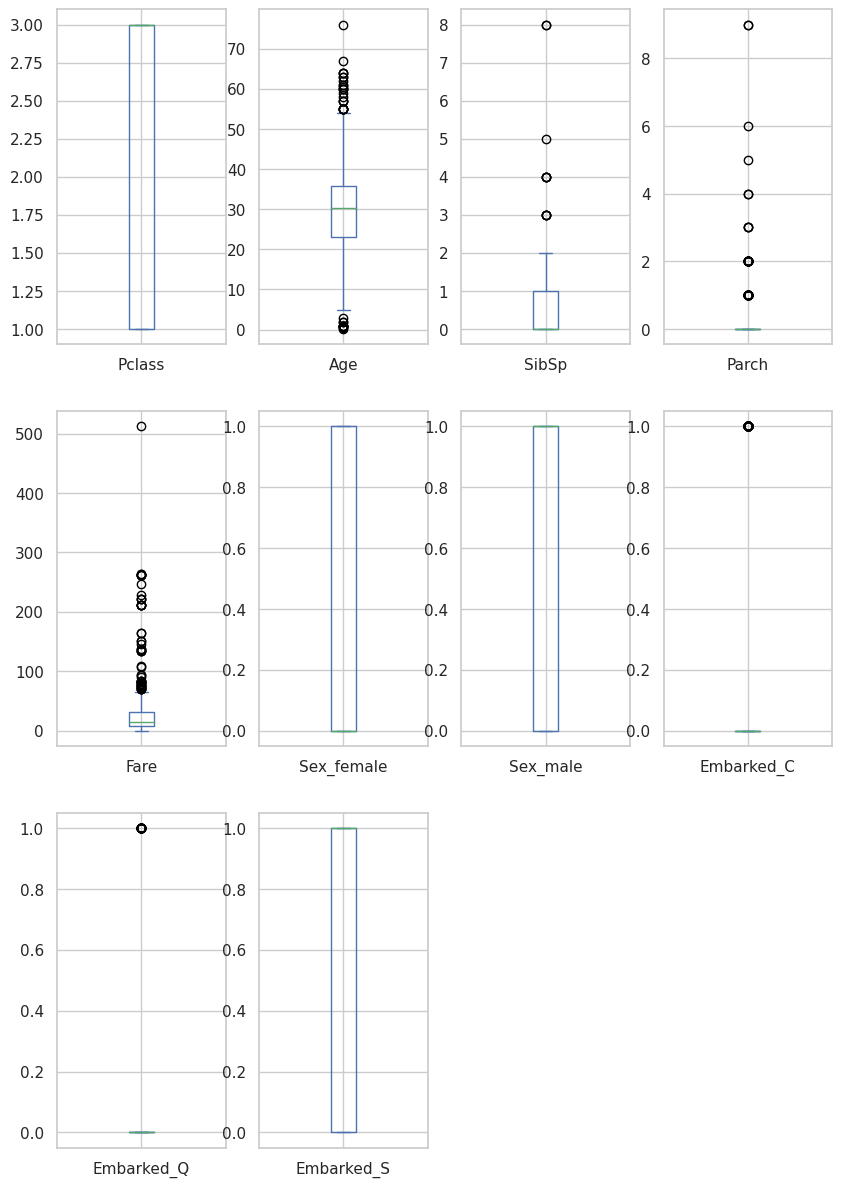

In [126]:
#gráfico de boxplots

titanic_test.plot(kind ='box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (10,20))
plt.show()

### Eliminar outliers

In [127]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

El rango intercuartil (IQR, por sus siglas en inglés) es una medida estadística que se utiliza comúnmente para identificar y tratar valores atípicos en un conjunto de datos. <br>
Una vez calculado el IQR, se utilizará para definir un umbral para identificar valores atípicos.
<br> Se considerarán como atípicos los valores por encima o por debajo de 1.5 veces el IQR.

In [128]:
# ##FLOORING and CAPING
# Q1 = titanic['Fare'].quantile(0.25)
# Q3 = titanic['Fare'].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + (whisker_width*IQR)

In [129]:
# ##FLOORING and CAPING
# Q1 = titanic_test['Fare'].quantile(0.25)
# Q3 = titanic_test['Fare'].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + (whisker_width*IQR)

In [130]:
# ##FLOORING and CAPING
# Q1 = titanic['SibSp'].quantile(0.25)
# Q3 = titanic['SibSp'].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + (whisker_width*IQR)

In [131]:
# ##FLOORING and CAPING
# Q1 = titanic_test['SibSp'].quantile(0.25)
# Q3 = titanic_test['SibSp'].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + (whisker_width*IQR)

 la función np.where() de NumPy para ajustar los valores en la columna 'Fare'. Los valores que son mayores que el límite superior se reemplazan con el valor del límite superior ('upper_whisker'), y los valores que son menores que el límite inferior se reemplazan con el valor del límite inferior ('lower_whisker')

In [132]:
# titanic['Fare']=np.where(titanic['Fare']>upper_whisker,upper_whisker,np.where(titanic['Fare']<lower_whisker,lower_whisker,titanic['Fare']))
# titanic['Fare'].plot(kind ='box')
# # plt.show()

In [133]:
# titanic_test['Fare']=np.where(titanic_test['Fare']>upper_whisker,upper_whisker,np.where(titanic_test['Fare']<lower_whisker,lower_whisker,titanic_test['Fare']))
# titanic_test['Fare'].plot(kind ='box')
# plt.show()

In [134]:
# titanic['SibSp']=np.where(titanic['SibSp']>upper_whisker,upper_whisker,np.where(titanic['SibSp']<lower_whisker,lower_whisker,titanic['SibSp']))
# titanic['SibSp'].plot(kind ='box')
# plt.show()

In [135]:
# titanic_test['SibSp']=np.where(titanic_test['SibSp']>upper_whisker,upper_whisker,np.where(titanic_test['SibSp']<lower_whisker,lower_whisker,titanic_test['SibSp']))
# titanic_test['SibSp'].plot(kind ='box')
# plt.show()

## Matriz de correlación


la correlación nos indica qué tan relacionados están unos atributos de los otros, qué tanto afecta la variación de uno en el comportamiento del otro. <br>
-Un valor de correlación cercano a 1 o -1 indica una fuerte correlación, mientras que un valor cercano a 0 indica una correlación débil.
Dado que se pretende predecir qué valores son significativos para predecir la variable de 'Survived', para los modelos se utilizarán aquellas columnas que reflejen valores más acercados a 1 como:
- P_Class
- Sex
- Fare
- Cabin_Category


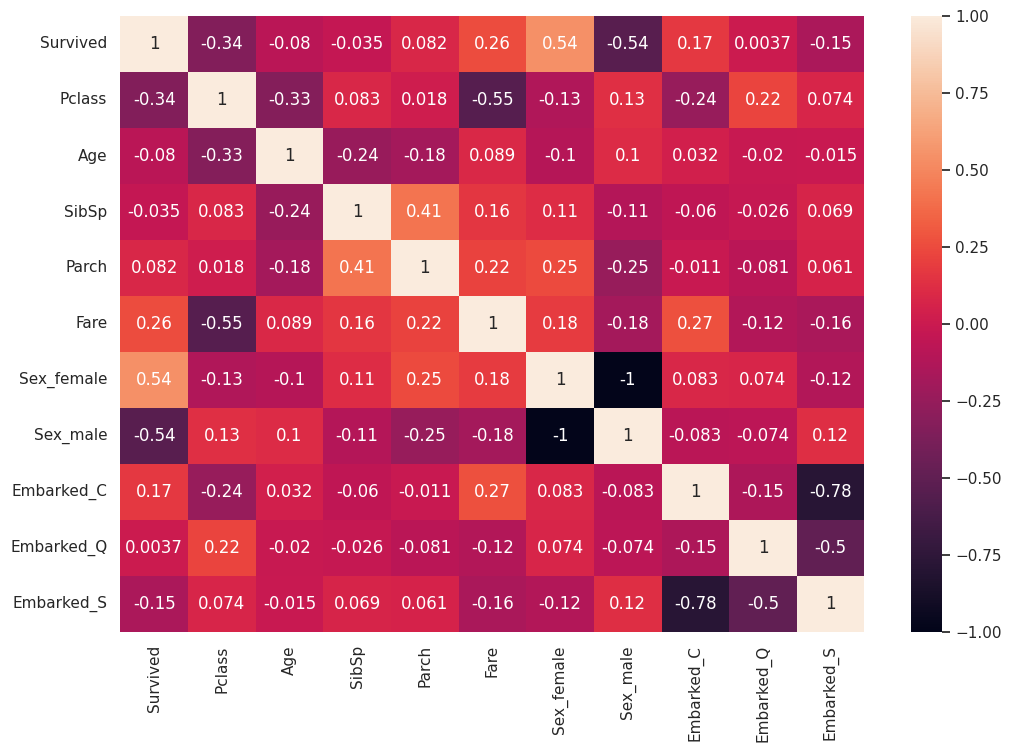

In [136]:
correlacion = titanic.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot = True)
plt.show()

# 2. Clasificación

### a. Selección de clasificadores

#### i. Elegir tres algoritmos de clasificación que se utilizarán en el proyecto. Justificar la selección de cada algoritmo.

**Regresión Logística:**
* Puede servir como un punto de referencia inicial para evaluar el rendimiento de otros modelos más complejos.
* Algoritmo de clasificación binaria simple y efectivo.
* Fácil de interpretar


**Random Forest:**
* Algoritmo de ensamble robusto, versátil y funciona bien en conjuntos de datos con características mixtas y datos faltantes
* Es robusto ante datos ruidosos y valores atípicos
* Reduce el riesgo de sobreajuste y puede capturar patrones más complejos en los datos

**Naive Bayes:**
* De manera similar a Regresión Logística, puede servir como un punto de referencia inicial en la evaluación de modelos más complejo
* Algoritmo de clasificación simple pero efectivo que se basa en el teorema de Bayes
* Computacionalmente eficiente y puede ser rápido en la clasificación
* Maneja fácilmente características categóricas, ya que asume independencia condicional entre las características

**KNN:**
* Tamaño del conjunto de datos Titanic no es muy grande, por lo que usar KNN es una buena opción
* Intepretación sencilla ya que se basa en el principio de vecinos cercanos
* Se cuenta con un número razonable de dimensiones por lo que es viable el uso de este modelo
* Robustez frente a outliers


### b. Train-test-validate split

#### i. Utilizar k-cross validation para realizar la clasificación. Seleccionar el valor de "k" y justificar la elección.

La selección del valor k es una tarea fundamental al momento de realizar el K-Cross Validation.
Cuando se elige un valor muy grande para k, esto puede resultar ser computacionalmente costos y un tiempo de ejecución elevados cuando se tiene un conjunto grande de datos. De igual manera, se puede caer en un underfitting, esto debido a que cada fold contiene pocos datos para entrenar el modelo.
Por otro lado, cuando los valores de k son muy pequeños, las estimaciones del performance del modelo pueden estar sesgadas y ser inestables, esto puede ser explicado por la variabilidad en la partición de los datos. Por lo anterior, puede resultar en una evaluación poco precisa y confiable.
Es por esto que se decidió seguir la convención de usar un valor de 5, debido a que este proporciona un buen equilibrio entre estabilidad y eficiencia computacional en la mayoría de los casos.

Para las características numéricas continuas ('Age', 'SibSp', 'Parch', 'Fare'), es común y apropiado aplicar la estandarización, esto mitiga la influencia de valores atípicos, mejora la consistencia de los datos así como la generalización del modelo. Por otra parte, las características discretas (categóricas) que ya fueron codificadas no necesitan una estandarización, ya que esto podría eliminar información útil.

In [137]:
X_train = titanic.drop(columns=['Survived'])
y_train = titanic['Survived']

X_test = titanic_test
y_test = gender_submission.drop(columns=['PassengerId'])

X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [138]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [139]:
# 1. Extrae la columna "Age" de los conjuntos de entrenamiento y prueba
X_train_temp = X_train[['Age', 'SibSp', 'Parch', 'Fare']]
X_test_temp = X_test[['Age', 'SibSp', 'Parch', 'Fare']]

# 2. Inicializa el escalador
scaler = StandardScaler()

# 3. Ajusta el escalador en los datos de entrenamiento de "Age" y luego transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_temp)

# 4. Utiliza el mismo escalador para transformar los datos de prueba de "Age"
X_test_scaled = scaler.transform(X_test_temp)

# 5. Reemplaza la columna "Age" original en los conjuntos de entrenamiento y prueba con los datos estandarizados
X_train[['Age', 'SibSp', 'Parch', 'Fare']] = X_train_scaled
X_test[['Age', 'SibSp', 'Parch', 'Fare']] = X_test_scaled

In [140]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.594732,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1,0.635319,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,3,-0.287220,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1,0.404684,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,3,0.404684,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


#### ii. Calcular la exactitud, precisión, matriz de confusión, curva ROC y AUC. Explicar cada una de estas métricas.

In [141]:
import datetime

def evaluate_model(model, X_train, y_train, X_test, y_test):
  # Define the number of folds and create a KFold object
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Perform k-fold cross-validation and get the accuracy scores
  scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

  # Print the accuracy scores for each fold
  for fold, score in enumerate(scores, 1):
      print(f'Fold {fold}: Accuracy = {score:.4f}')

  # Calculate and print the mean and standard deviation of the accuracy scores
  mean_accuracy = scores.mean()
  std_accuracy = scores.std()
  print(f'Mean Accuracy = {mean_accuracy:.4f}')
  print(f'Standard Deviation = {std_accuracy:.4f}')

  # Train the KNN model on the entire training data
  model.fit(X_train, y_train)

  # Assuming you have a new dataset called 'X_new' that you want to make predictions on
  # Use the trained model to make predictions on the new dataset
  predicted_labels_new = model.predict(X_test)
  sub = gender_submission
  sub['Survived']= predicted_labels_new
  sub.to_csv('submission_' + type(model).__name__ + "_" + datetime.datetime.now().strftime("%H:%M:%S") + '.csv', index = False)

  y_probs = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)

  #AUC
  roc_auc = roc_auc_score(y_test, y_probs)
  print(f"AUC:{roc_auc}")

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f"ROC Curve for{model}")
  plt.legend(loc='lower right')
  plt.show()
  print()

  ##REPORT PRINTING
  print(' CLASSIFICATION REPORT: Test Dataset')
  print(classification_report(y_test, predicted_labels_new))

  ##CONFUSION MATRIX
  conf = confusion_matrix(y_test, predicted_labels_new)
  label= ("Died", "Survived")
  plt.title('Confusion Matrix: Test Dataset')
  sns.heatmap(conf, annot = True, xticklabels = label, yticklabels = label)
  plt.tight_layout()
  plt.show()

##### RANDOM FOREST CLASSIFIER

In [142]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Perform an exhaustive hyperparameter search
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)

# Train the SVM model with the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search_rf.best_params_
best_estimator = grid_search_rf.best_estimator_
accuracy = best_estimator.score(X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best estimator:", best_estimator)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=10, n_estimators=200)
Accuracy: 0.8349282296650717


Fold 1: Accuracy = 0.8156
Fold 2: Accuracy = 0.8315
Fold 3: Accuracy = 0.8652
Fold 4: Accuracy = 0.8146
Fold 5: Accuracy = 0.8483
Mean Accuracy = 0.8350
Standard Deviation = 0.0194
AUC:0.9267906608626829


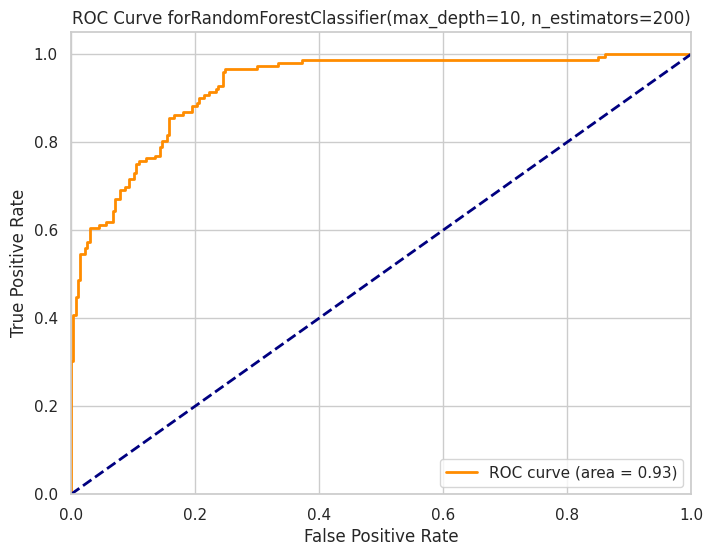


 CLASSIFICATION REPORT: Test Dataset
              precision    recall  f1-score   support

           0       0.85      0.91      0.87       266
           1       0.81      0.71      0.76       152

    accuracy                           0.83       418
   macro avg       0.83      0.81      0.82       418
weighted avg       0.83      0.83      0.83       418



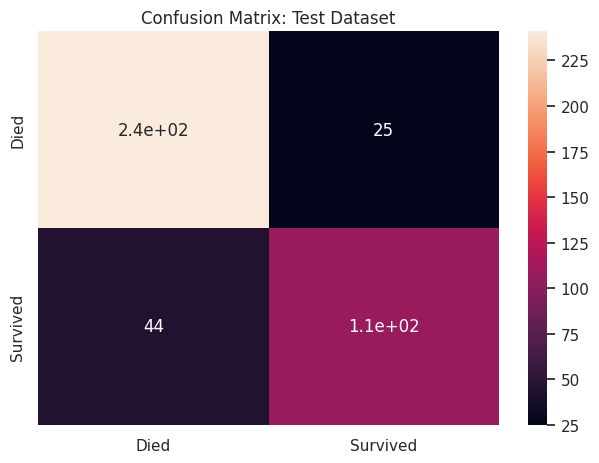

In [149]:
rf = RandomForestClassifier(max_depth=10, n_estimators=200)
evaluate_model(rf, X_train, y_train, X_test, y_test)

##### REGRESIÓN LOGíSTICA

Fold 1: Accuracy = 0.8101
Fold 2: Accuracy = 0.7978
Fold 3: Accuracy = 0.8483
Fold 4: Accuracy = 0.7753
Fold 5: Accuracy = 0.7809
Mean Accuracy = 0.8025
Standard Deviation = 0.0260
AUC:0.9797437673130194


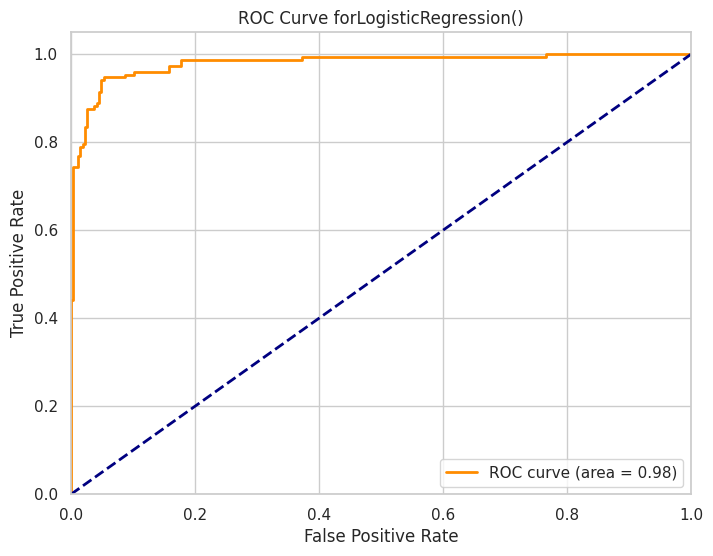


 CLASSIFICATION REPORT: Test Dataset
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



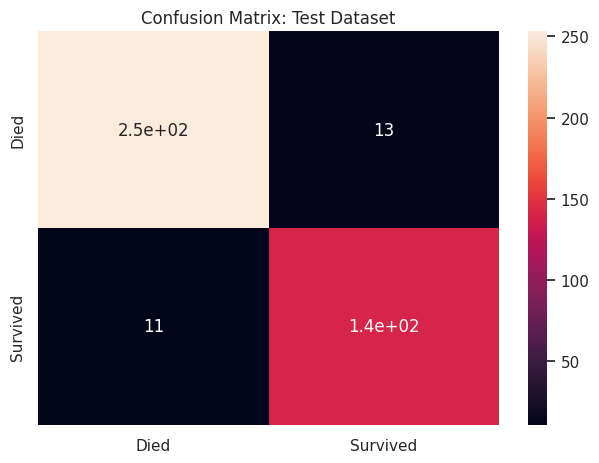

In [144]:
lr = LogisticRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

##### NAIVE BAYES

Conjunto de Prueba: NAIVE BAYES <br>
- El  código ajusta el modelo GaussianNB a los datos de entrenamiento (X_train y Y_train) y luego evalúa el modelo en un conjunto de prueba independiente (X_test y Y_test). Esto significa que se utiliza un conjunto de prueba fijo para evaluar el rendimiento del modelo,

Fold 1: Accuracy = 0.7765
Fold 2: Accuracy = 0.7921
Fold 3: Accuracy = 0.8315
Fold 4: Accuracy = 0.7528
Fold 5: Accuracy = 0.7978
Mean Accuracy = 0.7901
Standard Deviation = 0.0259
AUC:0.942743371586862


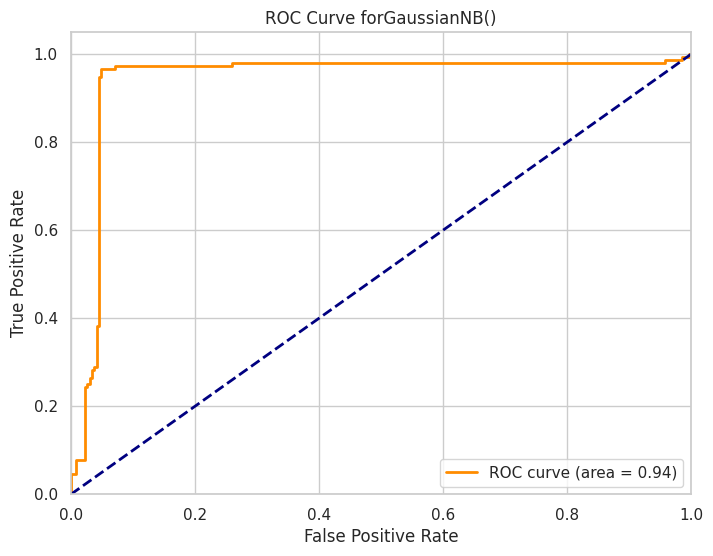


 CLASSIFICATION REPORT: Test Dataset
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       266
           1       0.83      0.97      0.89       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.91       418
weighted avg       0.93      0.92      0.92       418



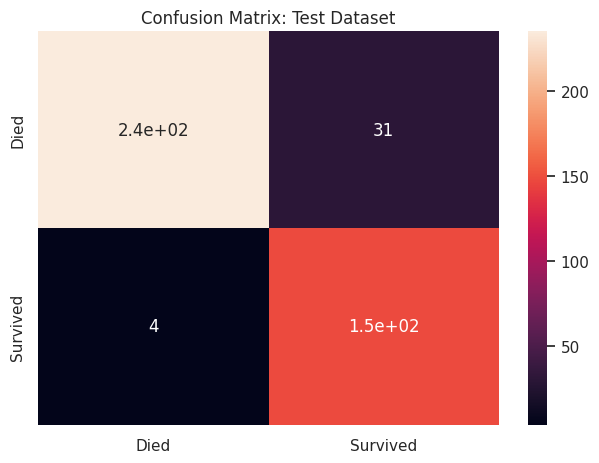

In [145]:
gnb = GaussianNB()
evaluate_model(gnb, X_train, y_train, X_test, y_test)

##### K — Nearest Neighbor Algorithm

In [146]:
# X_train, X_test,Y_train, Y_test = train_test_split(Xnuevo,Y, random_state = 42, test_size = 0.2)
acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    knn_Y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, knn_Y_pred))
    print("For k = ",i," : ",accuracy_score(y_test, knn_Y_pred))

For k =  1  :  0.7392344497607656
For k =  2  :  0.7870813397129187
For k =  3  :  0.8397129186602871
For k =  4  :  0.8373205741626795
For k =  5  :  0.84688995215311
For k =  6  :  0.868421052631579
For k =  7  :  0.868421052631579
For k =  8  :  0.8803827751196173
For k =  9  :  0.861244019138756
For k =  10  :  0.8708133971291866
For k =  11  :  0.8636363636363636
For k =  12  :  0.8779904306220095
For k =  13  :  0.8779904306220095
For k =  14  :  0.8708133971291866
For k =  15  :  0.8708133971291866
For k =  16  :  0.861244019138756
For k =  17  :  0.8708133971291866
For k =  18  :  0.868421052631579
For k =  19  :  0.8708133971291866


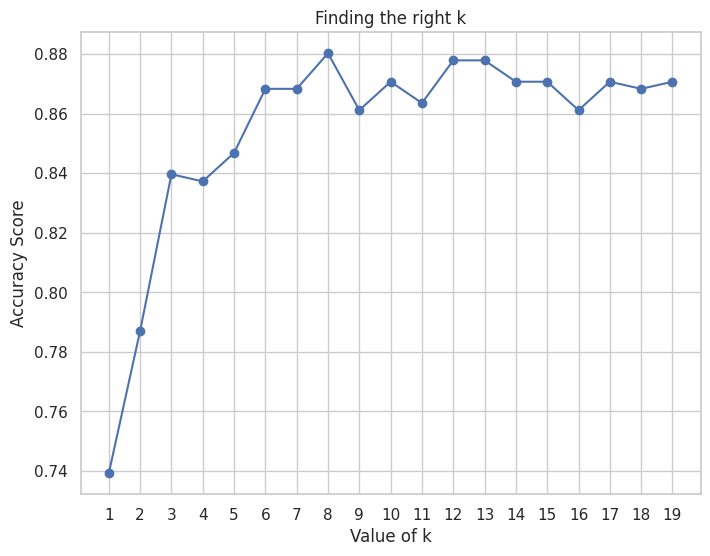

In [147]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

El valor preferido de k = 10, presenta un valor más alto de accuracy.

Fold 1: Accuracy = 0.8101
Fold 2: Accuracy = 0.7865
Fold 3: Accuracy = 0.8708
Fold 4: Accuracy = 0.8034
Fold 5: Accuracy = 0.8090
Mean Accuracy = 0.8159
Standard Deviation = 0.0287
AUC:0.9308221210922041


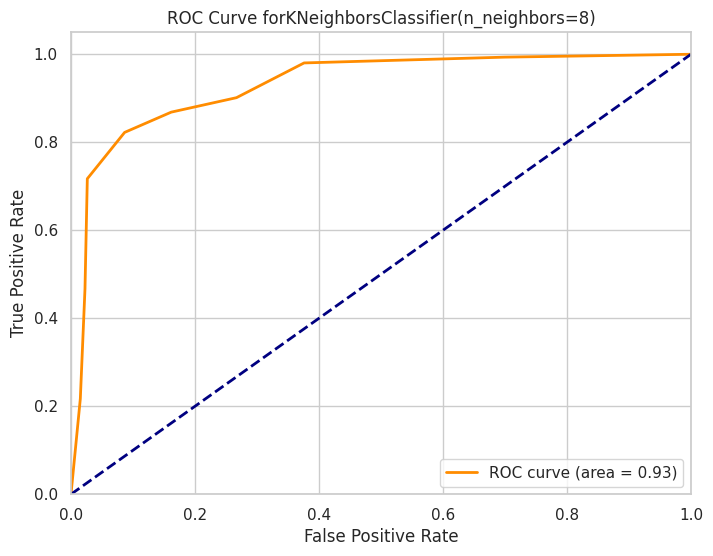


 CLASSIFICATION REPORT: Test Dataset
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       266
           1       0.84      0.82      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



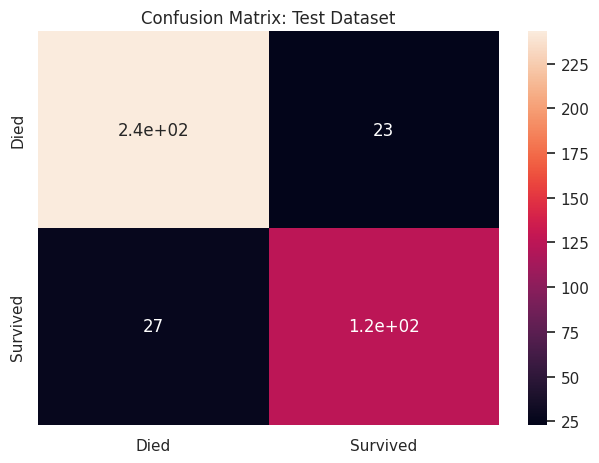

In [148]:
k = 8
knn = KNeighborsClassifier(n_neighbors = k)
evaluate_model(knn, X_train, y_train, X_test, y_test)

### c. Métricas de evaluación

Se eligieron las siguientes métricas de evaluación para lo diferentes modelos, ya que se consideraron significativas para medir el rendimiento que estaban teniendo los modelos.

1. Accuracy: mide la proporción de predicciones que el modelo obtuvo correctamente del total de predicciones
2. Precision: mide la calidad de predicciones positivas del modelo
3. Recall: mide la proporción de verdaderos positivos con respecto a todos los elementos positivos que realmente hay
4. F1 Score: mide el equilibrio entre precisión y exhaustividad
1 = todas las predicciones correctas
5. Curva ROC: muestra la relación entre el recall y la tasa de falsos positivos, que tan bien el modelo distingue clases positivas y negativas
6. AUC: mide el área bajo la curva,
1 = buen rendimiento del modelo en la clasificación
0.5 = rendimiento similar al azar
7. Matriz de confusión: es una herramienta que nos ayuda a la visualización del rendimiento del algoritmo (Actual vs Predicted values)

#### i. Modelo ganador

El modelo ganador fue KNN, ya que pudimos obtener un accuracy mayor con este modelo si comparamos los otros, lo que nos muestra el total de predicciones correctas que obtuvo el modelo  del total de las predicciones que hizo, tambien podemos observar con nuestra matriz de confusión que tiene un balance en predicciones de las 2 clases del problema con una mayor capacidad identificando las personas que murieron que las que sobrevivieron, esto tambien lo podemos reforzar viendo nuestro valor de F1, que tiene un valor cercano a 1. Por estas razones de definio que el modeo con mejor rendimeinto o ganador fue el modelo KNN o vecinos cercanos.